In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Ερώτημα 1

##Φόρτωση δεδομένων

In [30]:
df = pd.read_csv('water_potability.csv')

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


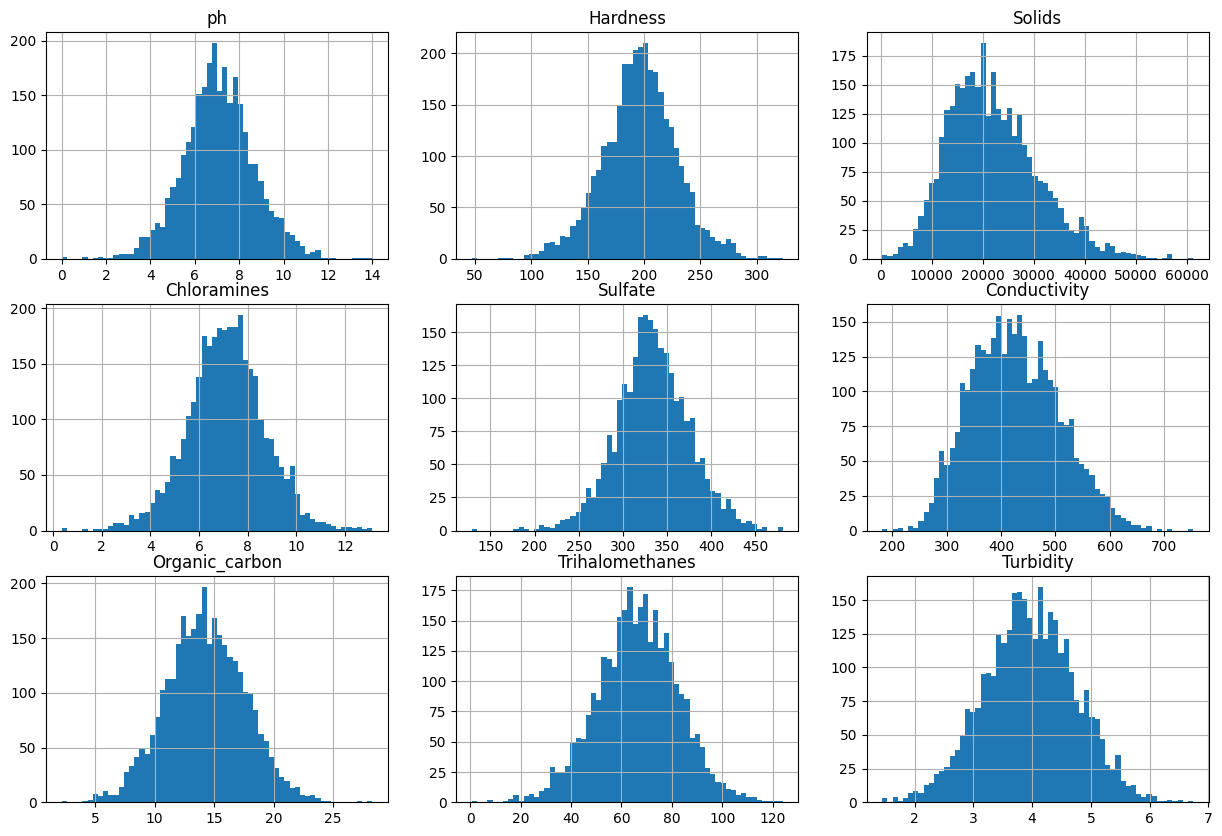

In [31]:
fig, a = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
index = 0
for index in range( len(df.columns) ):
	column = df.columns[index]
	if column != 'Potability':
		df[column].hist( bins = 60, ax = a[index//3, index%3] )
		a[index//3, index%3].set_title( column )


In [32]:
for i in range( len( df.columns ) - 1 ):
	precentage_missing = df[ df.columns[i] ].isnull().sum() / len( df ) * 100
	print( f"{df.columns[i]}: {precentage_missing:.2f}%" )

ph: 14.99%
Hardness: 0.00%
Solids: 0.00%
Chloramines: 0.00%
Sulfate: 23.84%
Conductivity: 0.00%
Organic_carbon: 0.00%
Trihalomethanes: 4.95%
Turbidity: 0.00%


Ως προς την κατανομή τα δεδομένα μας φαίνονται αρκετά ικανοποιητικά. Όμως βλέπουμε ότι έχουμε αρκετά ελλειπή δεδομένα. Πιο ειδικά για τα θειϊκά μας λείπουν κοντά στο 1/4 των δειγμάτων μας. Επίσης για το pH βλέπουμε ότι έχουμε κάποιες ακραίες τιμές κοντά στο 0 που σημαίνει ότι πιθανός έχουμε λάθος στις μετρήσεις(ή οι άνθρωποι εκεί πίνουν υδροχλωρικό οξύ). 

Text(0.5, 1.0, 'Potability')

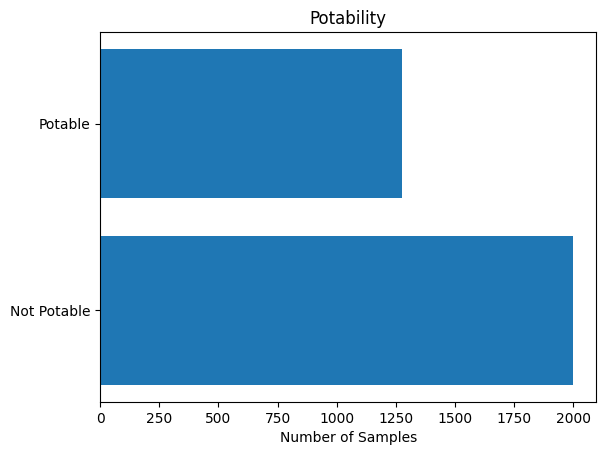

In [33]:
potability_counts = df['Potability'].value_counts();
plt.barh( potability_counts.index, potability_counts.values )
plt.yticks( potability_counts.index, ['Not Potable', 'Potable'] )
plt.xlabel('Number of Samples')
plt.title('Potability')

#Ερώτημα 2

##pH < 6.5

In [34]:
mask_below_6_5 = ( df['ph'] < 6.5 )
vc = df['Potability'][ mask_below_6_5 ].value_counts()
total = vc[0] + vc[1]
vc = vc/total*100
print( f"Precentage of non-potable samples with pH < 6.5: {vc[0]:.2f}" )
print( f"Precentage of potable samples with pH < 6.5: {vc[1]:.2f}" )

Precentage of non-potable samples with pH < 6.5: 63.22
Precentage of potable samples with pH < 6.5: 36.78


## 6.5 <= ph <= 8.5

In [35]:
mask_between_6_5_8_5 = ( (df['ph'] >= 6.5) & (df['ph'] <= 8.5) )
vc = df['Potability'][ mask_between_6_5_8_5 ].value_counts()
total = vc[0] + vc[1]
vc = vc/total*100
print( f"Precentage of non-potable samples with 6.5 <= pH <= 8.5: {vc[0]:.2f}" )
print( f"Precentage of potable samples with 6.5 <= pH <= 8.5: {vc[1]:.2f}" )

Precentage of non-potable samples with 6.5 <= pH <= 8.5: 56.10
Precentage of potable samples with 6.5 <= pH <= 8.5: 43.90


## ph > 8.5

In [36]:
mask_above_8_5 = ( df['ph'] > 8.5 )
vc = df['Potability'][ mask_above_8_5 ].value_counts()
total = vc[0] + vc[1]
vc = vc/total*100
print( f"Precentage of non-potable samples with pH > 8.5: {vc[0]:.2f}" )
print( f"Precentage of potable samples with pH > 8.5: {vc[1]:.2f}" )

Precentage of non-potable samples with pH > 8.5: 66.87
Precentage of potable samples with pH > 8.5: 33.13


Επαληθεύουμε του προηγούμενου ερωτήματος το συμπέρασμα δηλαδή ότι τα δεδομένα μας έχουν θόρυβο και αυτό το βλέπουμε από το πολύ υψηλό ποσοστό γύρω στο 35 %
από πόσιμα δείγματα έξω από τα όρια 6.5 και 8.5

# Ερώτημα 4

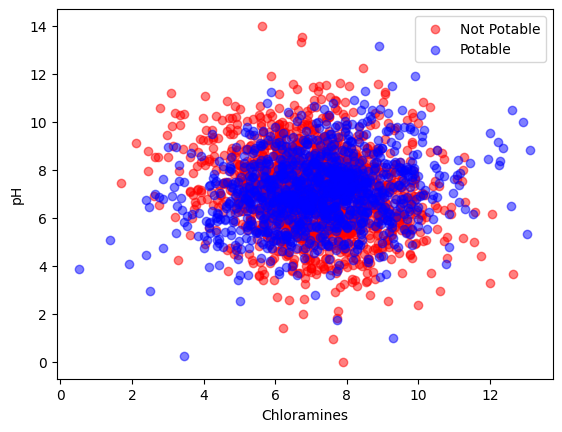

In [37]:
plt.scatter( df['Chloramines'][df['Potability'] == 0], df['ph'][df['Potability'] == 0], c='red', alpha=0.5 )
plt.scatter( df['Chloramines'][df['Potability'] == 1], df['ph'][df['Potability'] == 1], c='blue', alpha=0.5 )
plt.xlabel('Chloramines')
plt.ylabel('pH')
plt.legend( ['Not Potable', 'Potable'], loc='upper right' )

Potability
1    1242
Name: count, dtype: int64


Potability
0    1945
Name: count, dtype: int64

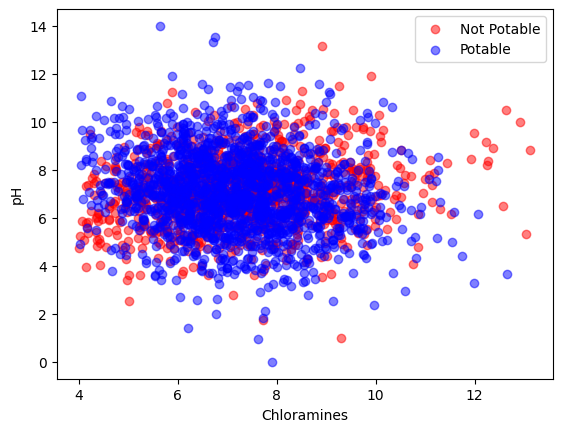

In [38]:
mask_pot_1_chlo_above_4 = ( (df['Potability'] == 1) & (df['Chloramines'] > 4) )
mask_pot_0_chlo_above_4 = ( (df['Potability'] == 0) & (df['Chloramines'] > 4) )
plt.scatter( df['Chloramines'][mask_pot_1_chlo_above_4], df['ph'][mask_pot_1_chlo_above_4], c='red', alpha=0.5 )
plt.scatter( df['Chloramines'][mask_pot_0_chlo_above_4], df['ph'][mask_pot_0_chlo_above_4], c='blue', alpha=0.5 )
plt.xlabel('Chloramines')
plt.ylabel('pH')
plt.legend( ['Not Potable', 'Potable'], loc='upper right' )

counts_1_potability = df['Potability'][ mask_pot_1_chlo_above_4 ].value_counts()
print(counts_1_potability)
counts_0_potability = df['Potability'][ mask_pot_0_chlo_above_4 ].value_counts()
counts_0_potability
# total = counts[0] + counts[1]
# precentage_potable_below_4 = counts[1]/total*100
# print( f"Precentage of potable samples with Chloramines < 4: {precentage_potable_below_4:.2f}" )

Εδώ δεν μπρορούμε να οδηγηθούμε σε κάποιο συμπέρασμα. Το scatter plot είναι έντονα μπλεγμένο.

# Ερώτημα 4
Διαλέγω να γεμίσω τις τιμές με την μέση τιμή

In [39]:
for column in df.columns:
		if df[column].isnull().sum() > 0:
				mean_value = df[column].mean()
				# df[column] = df[column].fillna( mean_value )
				df[column] = df[column].fillna( -1 )


# Eρώτημα 5

In [40]:
seed = 0
inputs = df.drop( columns=['Potability'] )
targets = df['Potability']
test_size = 0.2
x = inputs.to_numpy()
y = targets.to_numpy()
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=test_size, random_state= seed )

Φτιάχνω το πιο απλό δέντρο με όλες τις παραμέτρους σαν default

In [41]:
default_model = DecisionTreeClassifier( random_state = seed)

default_model.fit( x_train, y_train )

y_train_pred = default_model.predict( x_train )
y_pred = default_model.predict( x_test )

accuracy_score_on_training = accuracy_score( y_train, y_train_pred )
accuracy_score_on_test = accuracy_score( y_test, y_pred )

print( f"Accuracy score on training set: {accuracy_score_on_training:.4f}" )
print( f"Accuracy score on test set: {accuracy_score_on_test:.4f}" )

Accuracy score on training set: 1.0000
Accuracy score on test set: 0.5747


Παρατηρούμε εδώ ότι το δέντρο που έχουμε φτιάξει έχει 100% επιτυχία με τα δεδομένα εκπαίδευσης αλλά με το testset δεν θα μπορούσαμε να πούμε το ίδιο. 

# Ερώτημα 6

Total number of combinations to evaluate: 96
[0.6402439024390244, 0.6402439024390244, 0.6402439024390244, 0.6402439024390244, 0.6402439024390244, 0.6402439024390244, 0.6387195121951219, 0.6387195121951219, 0.6341463414634146, 0.6341463414634146]


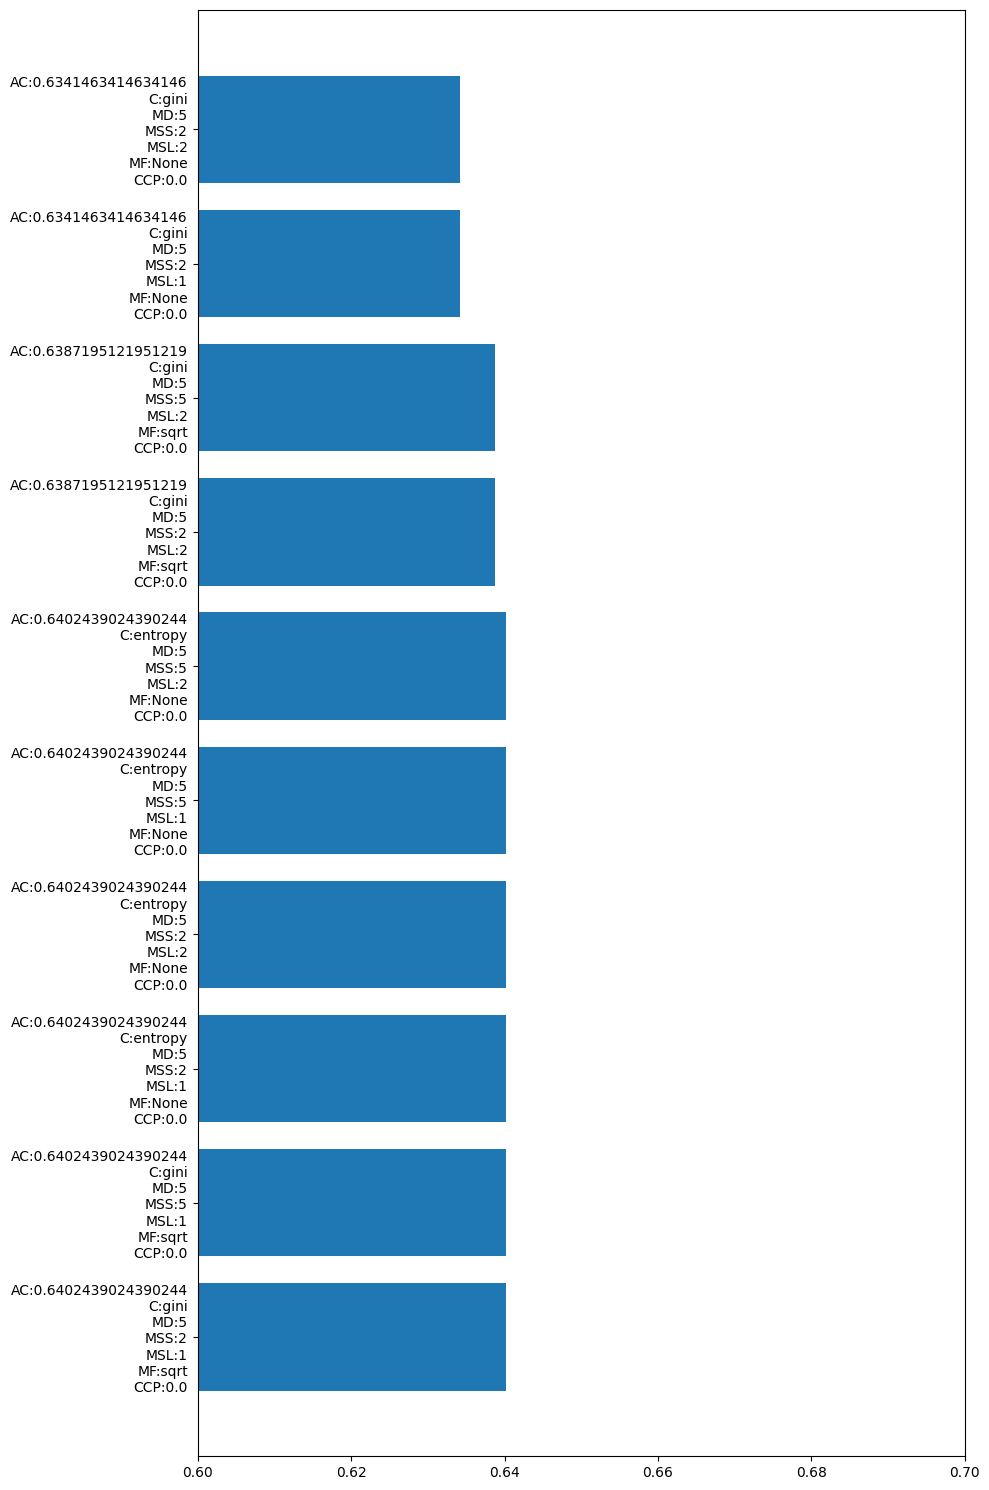

In [42]:
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
cost_complexity_pruning = [ 0., 0.01]

def getDecisionTreeModel( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha ):
		model = DecisionTreeClassifier( 
				random_state = seed,
				criterion = criterion,
				max_depth = max_depth,
				min_samples_split = min_samples_split,
				min_samples_leaf = min_samples_leaf,
				max_features = max_features,
				ccp_alpha = ccp_alpha
		)
		
		return model

def trainDecisionTreeModel( model, x_train = x_train, y_train = y_train ):
		model.fit( x_train, y_train )
		
		return model

def getAccuracy( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
		model = getDecisionTreeModel( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha )
		train_decision_tree_model = trainDecisionTreeModel( model, x_train, y_train )
		y_pred = model.predict( x_test )
		accuracy = accuracy_score( y_test, y_pred )

		return accuracy

getTotalNumberOfCombinations = ( len(criterion) * len(max_depth) * len(min_samples_split) *
								len(min_samples_leaf) * len(max_features) * len(cost_complexity_pruning) )
print( f"Total number of combinations to evaluate: {getTotalNumberOfCombinations}" )



getAccFromList = lambda item: item[0]

best_accuracies = []

def constructModelsNGetBestAccuracies( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cost_complexity_pruning, num_best_combinations=10, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
	best_combinations = []
	for c in criterion:
			for md in max_depth:
					for mss in min_samples_split:
							for msl in min_samples_leaf:
									for mf in max_features:
											for ccp in cost_complexity_pruning:
													accuracy = getAccuracy( c, md, mss, msl, mf, ccp, x_train, y_train, x_test, y_test )
													best_accuracies.append( accuracy )
													if( len(best_combinations) < num_best_combinations ):
															best_combinations.append( [ accuracy, c, md, mss, msl, mf, ccp ] )
															best_combinations.sort( key = getAccFromList, reverse=True )
													else:
															if( accuracy > best_combinations[-1][0] ):
																	best_combinations[-1] = [ accuracy, c, md, mss, msl, mf, ccp ]
																	best_combinations.sort( key = getAccFromList, reverse=True )
	return best_combinations
bar_plot_names = []
accuracies = []
plt.figure( figsize=(10, 15) )
best_combinations = constructModelsNGetBestAccuracies( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cost_complexity_pruning, num_best_combinations=10 )
for combo in best_combinations:
		bar_plot_names.append( f"AC:{combo[0]}\nC:{combo[1]}\nMD:{combo[2]}\nMSS:{combo[3]}\nMSL:{combo[4]}\nMF:{combo[5]}\nCCP:{combo[6]}" )
		accuracies.append( combo[0] )

# plt.barh(bar_plot_names[::-1], accuracies[::-1])
plt.barh( bar_plot_names, accuracies )
plt.xlim( 0.6, 0.7 )
plt.tight_layout()
print( accuracies )

Φαίνεται ότι στα περισσότερα βήματα ο αλγόριθμος έχει συγκλίνει. Στις δέκα καλύτερες τιμές θα δω πως τα πάνε και πάνω στο train set

[0.6435114503816793, 0.6435114503816793, 0.6690839694656489, 0.6683206106870229, 0.6687022900763359, 0.6683206106870229, 0.6438931297709923, 0.6438931297709923, 0.6717557251908397, 0.6709923664122137]


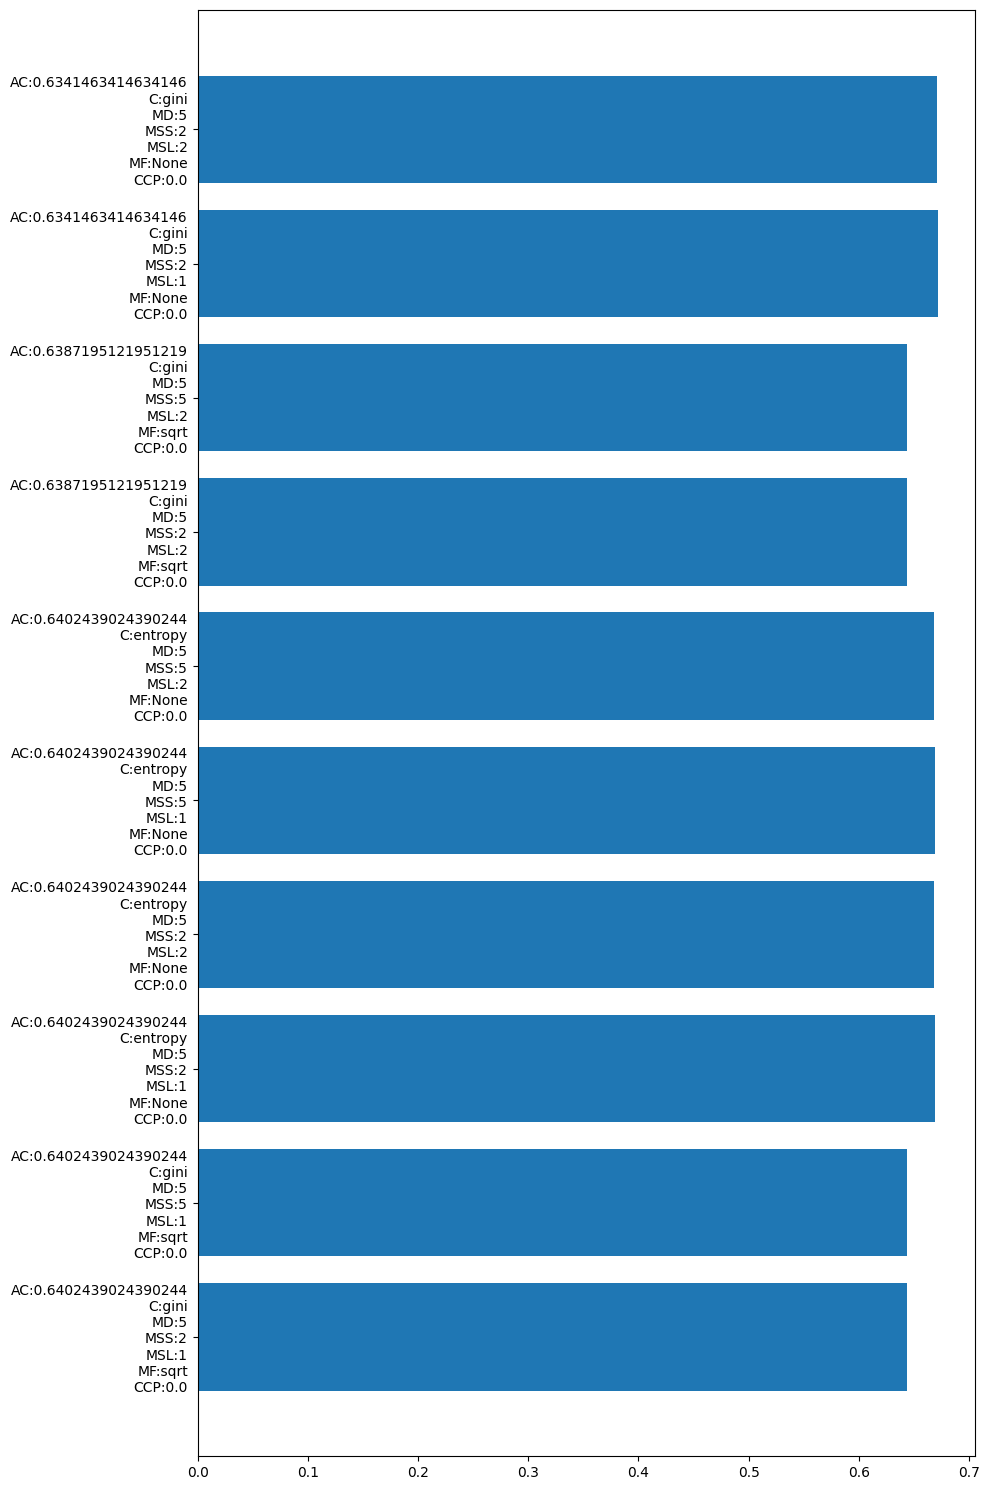

In [43]:
train_accuracies = []
for combo in best_combinations:
		train_accuracy = getAccuracy( combo[1], combo[2], combo[3], combo[4], combo[5], combo[6], x_train, y_train, x_train, y_train)
		train_accuracies.append( train_accuracy )

plt.figure( figsize=(10, 15) )
plt.barh( bar_plot_names, train_accuracies )
plt.tight_layout()
print( train_accuracies )

Μπορούμε να οδηγηθούμε στο συμπέρασμα από αυτό ότι το πρώτο μοντέλο που χρησιμοποιήσουμε έκανε overfit πάνω στα train_data.

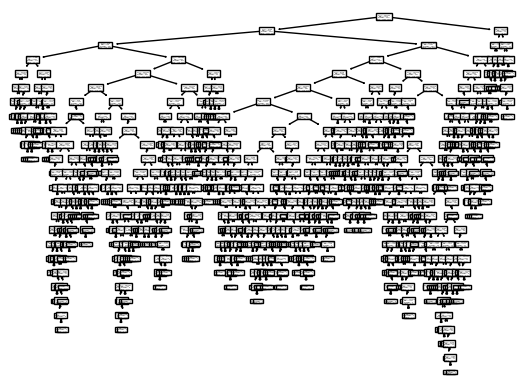

In [44]:
from sklearn import tree
tree.plot_tree( default_model )
print("")

Εκτυπώνοντας το δέντρο αποφάσεων βλέπουμε ότι είναι αρκετά μεγάλο και πολύπλοκο. Αυτό σημαίνει ότι το μοντέλο έχει μάθει πολύ καλά τα δεδομένα εκπαίδευσης, κάτι που εξηγεί και την υψηλή ακρίβεια στο train set σε σχέση με το test set. Η πολυπλοκότητα του δέντρου υποδηλώνει ότι το μοντέλο έχει κάνει overfitting στα δεδομένα εκπαίδευσης, καθώς έχει προσαρμοστεί υπερβολικά στα συγκεκριμένα δείγματα και δεν γενικεύει καλά σε νέα δεδομένα.

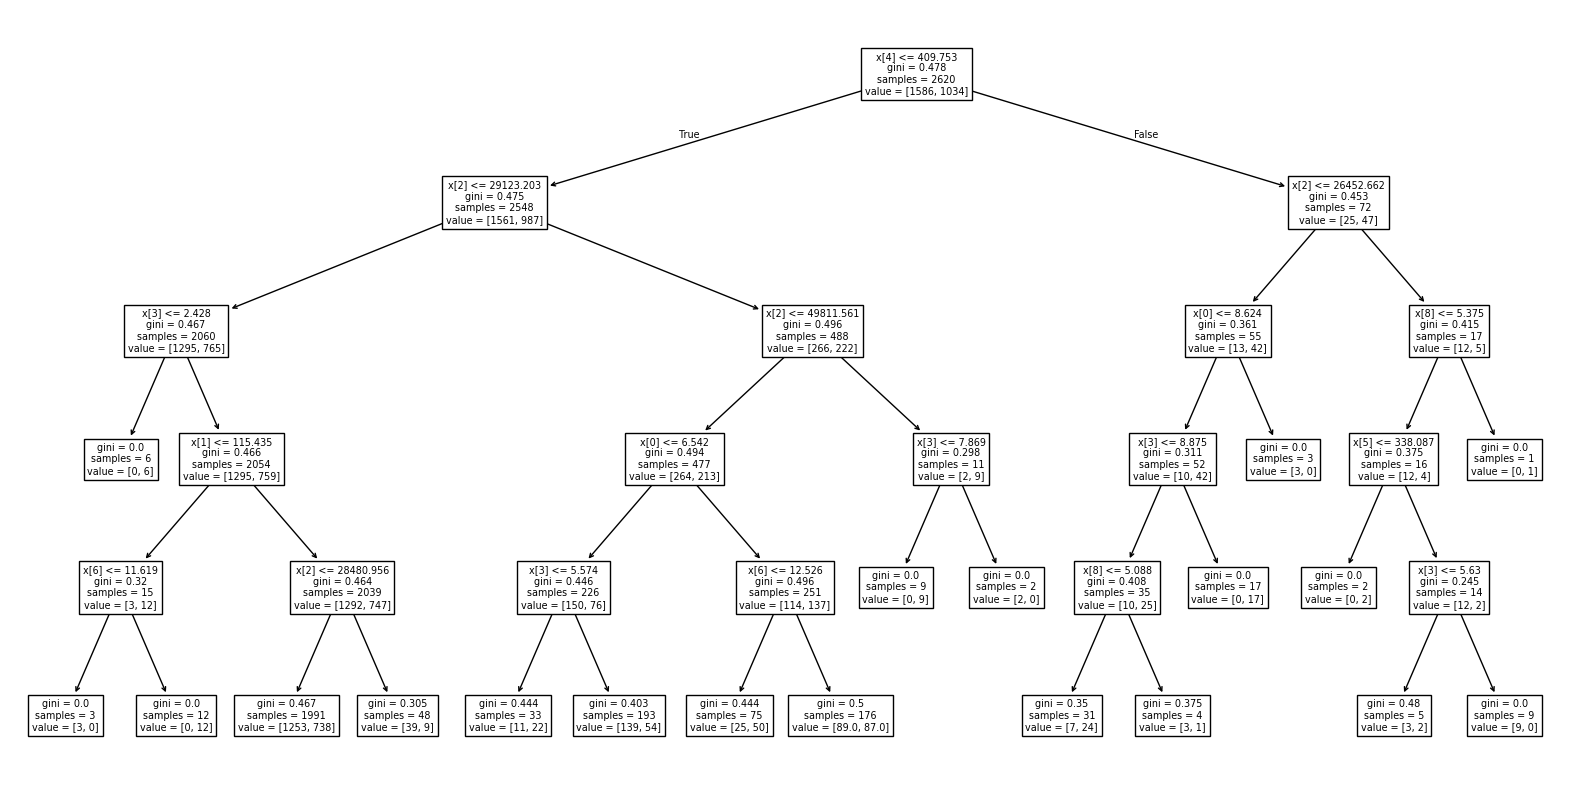

In [45]:
best_model = getDecisionTreeModel( best_combinations[0][1], best_combinations[0][2], best_combinations[0][3], best_combinations[0][4], best_combinations[0][5], best_combinations[0][6] )
trained_best_model = trainDecisionTreeModel( best_model, x_train, y_train )
plt.figure( figsize=(20,10) )
tree.plot_tree( best_model )
print("")

# Ερώτημα 8

Accuracy of best model with max_depth=3 on test set: 0.6296
Accuracy of best model with max_depth=3 on training set: 0.6431


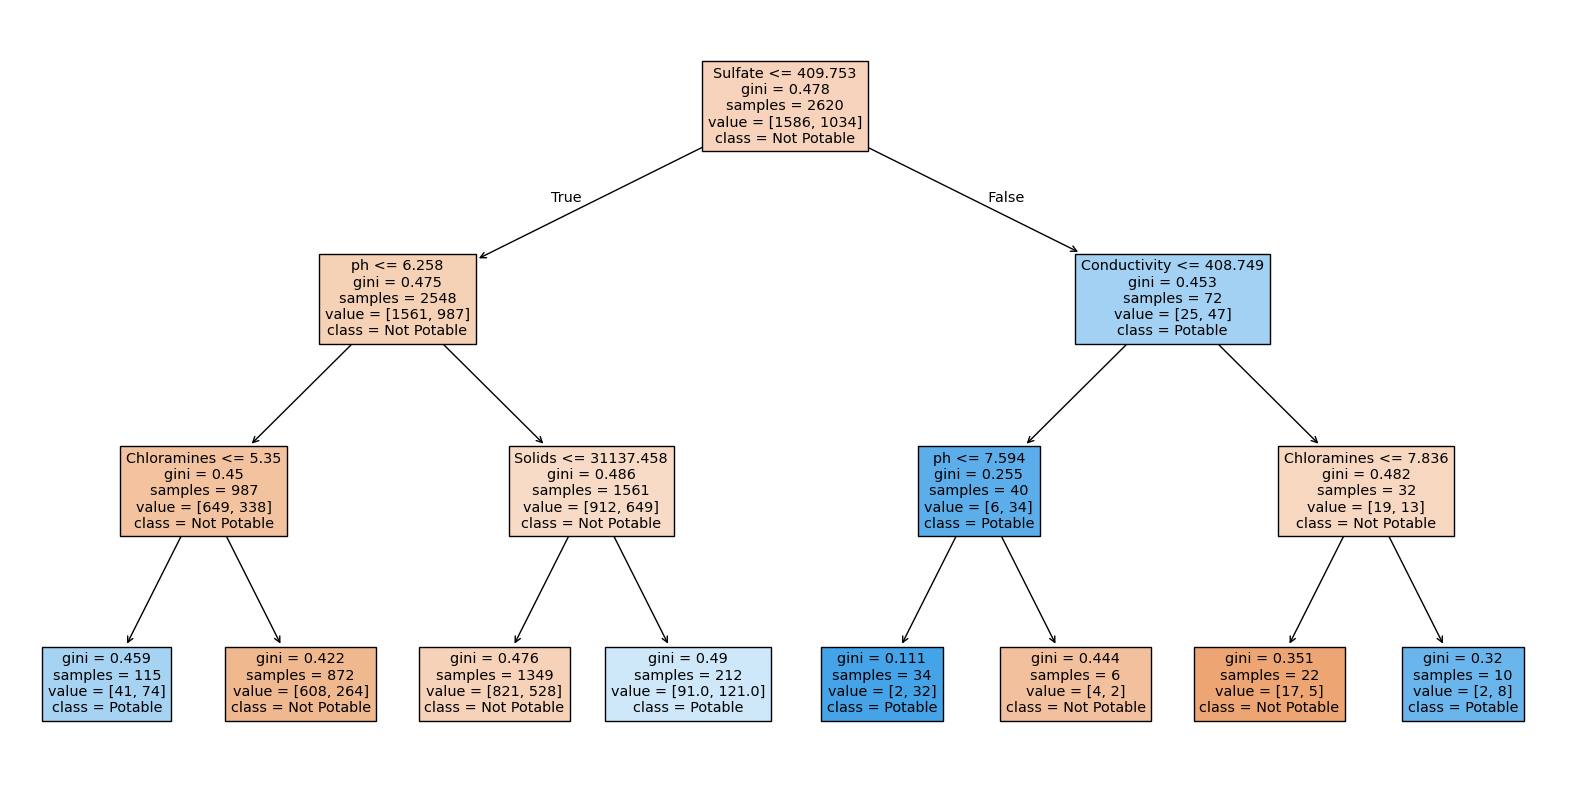

In [46]:
max_depth = [3]

best_combinations = constructModelsNGetBestAccuracies( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cost_complexity_pruning, num_best_combinations= 1 )
best_max_depth_3_model = getDecisionTreeModel( best_combinations[0][1], best_combinations[0][2], best_combinations[0][3], best_combinations[0][4], best_combinations[0][5], best_combinations[0][6] )
trained_best_max_depth_3_model = trainDecisionTreeModel( best_max_depth_3_model, x_train, y_train )
mx_3_model_y_pred = trained_best_max_depth_3_model.predict( x_test )
mx_3_model_accuracy = accuracy_score( y_test, mx_3_model_y_pred )
mx_3_model_train_y_pred = trained_best_max_depth_3_model.predict( x_train )
mx_3_model_accuracy_on_train = accuracy_score( y_train, mx_3_model_train_y_pred )
plt.figure( figsize=(20,10) )
tree.plot_tree( best_max_depth_3_model, feature_names = inputs.columns, class_names = ['Not Potable', 'Potable'], filled=True )
print( f"Accuracy of best model with max_depth=3 on test set: {mx_3_model_accuracy:.4f}" )
print( f"Accuracy of best model with max_depth=3 on training set: {mx_3_model_accuracy_on_train:.4f}" )


Εδώ βλέπουμε πως το μοντέλο παρόλο που μας έχει δώσει την καλύτερη απόδοση βλέπουμε μας πρωτείνει μία τιμή η οποία είναι παράλογη. Βλέπουμε ότι αν πάρουμε το μονοπάτι
Sulfate <= 409.753  -> ph <= 6.258 -> Chloramines <= 5.35 

Τότε αυτό μας βγάζει ότι μπορούμε να το πιούμε το νερό. Αυτο φυσικά είναι λάθος γιατί το ph δεν θα πρέπει να είναι λιγότερο από 6.5. Οπότε προχωράμε κάνοντας ένα filtering και επαναλαμμβάνοντας την διαδικασία.

Accuracy of best model on samples with 6.5 <= pH <= 8.5: 0.5789
Accuracy of best model on training samples with 6.5 <= pH <= 8.5: 0.5895


[Text(0.5, 0.875, 'Solids <= 34446.379\ngini = 0.493\nsamples = 1062\nvalue = [592, 470]\nclass = Not Potable'),
 Text(0.25, 0.625, 'Solids <= 13702.934\ngini = 0.49\nsamples = 986\nvalue = [563, 423]\nclass = Not Potable'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Chloramines <= 9.537\ngini = 0.443\nsamples = 160\nvalue = [107, 53]\nclass = Not Potable'),
 Text(0.0625, 0.125, 'gini = 0.412\nsamples = 145\nvalue = [103, 42]\nclass = Not Potable'),
 Text(0.1875, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = Potable'),
 Text(0.375, 0.375, 'Chloramines <= 6.182\ngini = 0.495\nsamples = 826\nvalue = [456, 370]\nclass = Not Potable'),
 Text(0.3125, 0.125, 'gini = 0.456\nsamples = 188\nvalue = [122, 66]\nclass = Not Potable'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 638\nvalue = [334, 304]\nclass = Not Potable'),
 Text(0.75, 0.625, 'Organic_carbon <= 12.697\ngini = 0.472\nsamples = 76\nvalue = [29, 47]\nclass = Potable'),
 Text(0.625, 0.75, '  False'),
 Text(0.

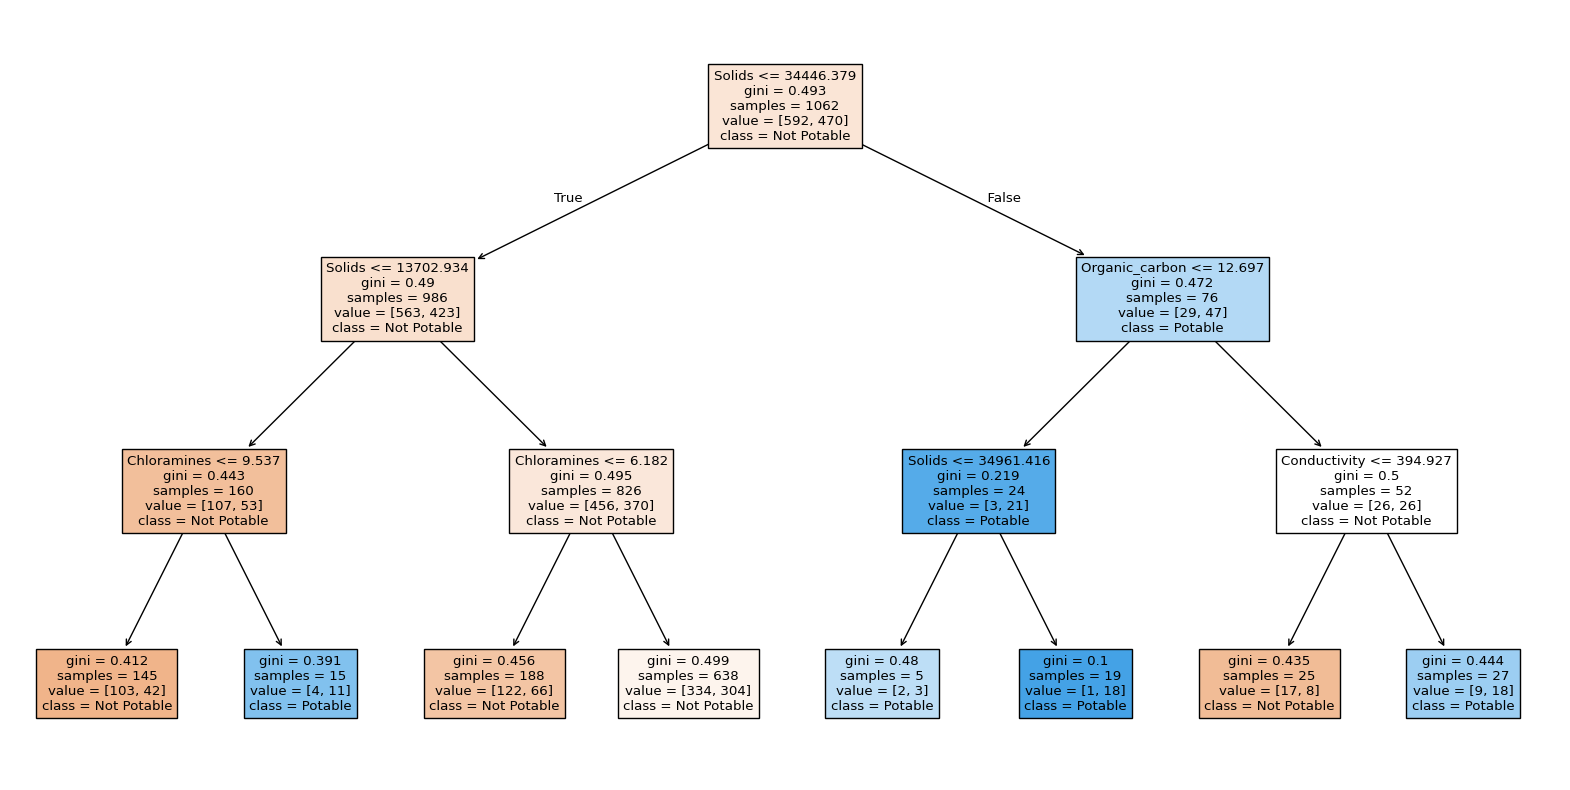

In [47]:
input_above_6_5_below_8_5_mask = ( (df['ph'] >= 6.5) & (df['ph'] <= 8.5) )

df_above_6_5_below_8_5 = df[ input_above_6_5_below_8_5_mask ]

input = df_above_6_5_below_8_5.drop( columns=['Potability'] )
target = df_above_6_5_below_8_5['Potability']

x = input.to_numpy()
y = target.to_numpy()
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=test_size, random_state= seed )

best_combinations = constructModelsNGetBestAccuracies( criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cost_complexity_pruning, num_best_combinations= 1, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test )
model_above_6_5_below_8_5 = getDecisionTreeModel( best_combinations[0][1], best_combinations[0][2], best_combinations[0][3], best_combinations[0][4], best_combinations[0][5], best_combinations[0][6] )
trained_model_above_6_5_below_8_5 = trainDecisionTreeModel( model_above_6_5_below_8_5, x_train, y_train )
y_pred = trained_model_above_6_5_below_8_5.predict( x_test )
accuracy = accuracy_score( y_test, y_pred )
y_pred_train = trained_model_above_6_5_below_8_5.predict( x_train )
accuracy_on_train = accuracy_score( y_train, y_pred_train )
print( f"Accuracy of best model on samples with 6.5 <= pH <= 8.5: {accuracy:.4f}" )
print( f"Accuracy of best model on training samples with 6.5 <= pH <= 8.5: {accuracy_on_train:.4f}" )
plt.figure( figsize=(20,10) )
tree.plot_tree( model_above_6_5_below_8_5, feature_names = inputs.columns, class_names = ['Not Potable', 'Potable'], filled=True )